In [1]:
# 📦 UNIR CSVs PARA MODELO DE ATRIBUCIÓN
import pandas as pd   # Manipulación y transformación de datos
import numpy as np    # Gestión de datos numéricos
import os             # Operaciones con archivos y rutas
import warnings       # Control de advertencias
import seaborn as sns
import matplotlib.pyplot as plt
# Suprimir avisos innecesarios
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
# Cargar los archivos CSV
df_web = pd.read_csv("../data/WEB.csv")
df_visit = pd.read_csv("../data/VISIT.csv")
df_time = pd.read_csv("../data/TIME.csv")
df_offline = pd.read_csv("../data/OFFLINE.csv")
df_inv = pd.read_csv("../data/INV.csv")

# Limpiar columnas numéricas mal formateadas en INV
inv_clean = df_inv.copy()
for col in inv_clean.columns:
    if inv_clean[col].dtype == 'object' and col != 'ID_Date':
        inv_clean[col] = inv_clean[col].str.replace(',', '.', regex=False)
        inv_clean[col] = pd.to_numeric(inv_clean[col], errors='coerce')

# Unir los datasets por la columna común 'ID_Date'
df = df_web.merge(df_visit, on='ID_Date') \
        .merge(df_time, on='ID_Date') \
        .merge(df_offline, on='ID_Date') \
        .merge(inv_clean, on='ID_Date')

# Eliminar filas con valores nulos
df = df.dropna()

# Exportar el DataFrame unido a CSV (opcional)
df.to_csv("../data/Modelo_Atribucion_Unificado.csv", index=False, encoding='utf-8-sig')

In [3]:
# Convertir ID_Date (tipo 202201) en una fecha real: 2022-01-01
df['Fecha'] = pd.to_datetime(df['ID_Date'].astype(str), format='%Y%m')

# Establecer Fecha como índice y ordenar
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)

#Indicar que es una serie mensua
df_web = df.asfreq('MS')

# Para que no salga la hora
df_web.index = df_web.index.to_period('M')
df.head()

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,...,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-01-01,202201,272382,4838,33222,94248,1415,65373,25,167199,63649,...,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14
2022-02-01,202202,352581,5823,38570,109531,546,77209,26,176733,124861,...,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08
2022-03-01,202203,332955,4845,33956,97805,5444,83178,341,173514,104132,...,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47
2022-04-01,202204,282169,3711,45949,90689,1184,69335,162,162805,74044,...,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91
2022-05-01,202205,261829,9037,48685,92069,8648,70972,210,156011,44196,...,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17


In [4]:
# Lista de columnas relevantes
# Estas son las columnas que nos vamos a quedar:
# - La columna de fecha (ID_Date)
# - Las columnas de cómo accede la gente a la página web (SocialNetworks, DirectTraffic, EMail, NaturalSearch, OnlineMedia, OtherReferrer, PaidSearch)
# - Las columnas de inversión (CINE, EXTERIOR, INTERNET, PRENSA, PRODUCCION, RADIO, REVISTAS, PlataformasVideo, VARIOS, INV_Total)
# - Las columnas relacionadas con fechas (Dias_mes, Dia_inicio_mes, Dia_findemes, working_days, Dias_fines_semana, Easterweek)
cols_to_keep = [
     "Unique_visitors", "Visit_Store", "Sales", "SocialNetworks", "DirectTraffic", "EMail",
    "NaturalSearch", "OnlineMedia", "OtherReferrer", "PaidSearch", "CINE", "EXTERIOR", "INTERNET", "PRENSA", "PRODUCCION", "RADIO",
    "REVISTAS", "PlataformasVideo", "VARIOS", "INV_Total", "Dias_mes", "Dia_inicio_mes", "Dia_findemes", "working_days",
    "Dias_fines_semana", "Easterweek"
]

# Filtrado total
filtered_df = df[cols_to_keep]

# Mostrar todas las columnas completas (sin "...")
pd.set_option('display.max_columns', None)


filtered_df.head()

,Unique_visitors,Visit_Store,Sales,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382,5516,1299,1415,65373,25,167199,63649,39808,13798,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14,31,5,7,21,10,0
2022-02-01,352581,6769,1752,546,77209,26,176733,124861,45543,28656,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08,28,1,7,20,8,0
2022-03-01,332955,6249,1897,5444,83178,341,173514,104132,43583,15243,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47,31,1,3,23,8,0
2022-04-01,282169,6507,1546,1184,69335,162,162805,74044,39650,18510,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91,30,4,5,22,8,1
2022-05-01,261829,7183,1784,8648,70972,210,156011,44196,40472,20031,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17,31,6,1,21,10,0


C:\Users\1cnac\AppData\Local\Temp\ipykernel_11328\2186284899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros


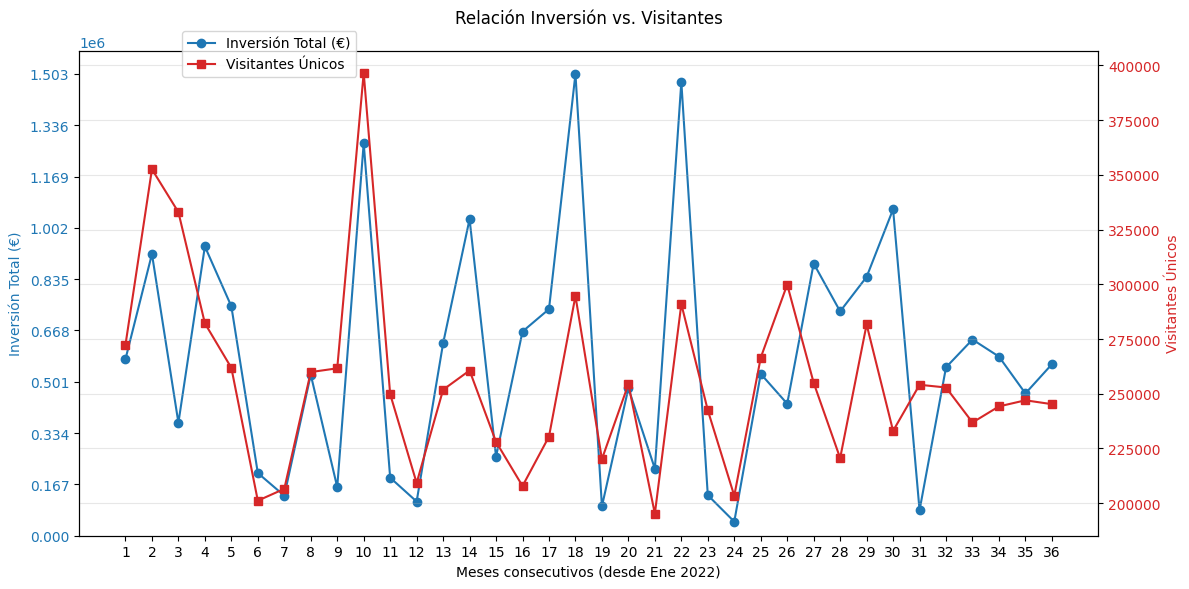

In [5]:
# Preparación de datos
filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros
meses = range(1, len(filtered_df) + 1)  # Índice numérico 1, 2, 3...

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Eje Izquierdo (Inversión Total) ---
ax1.plot(meses, filtered_df['INV_Total'], 
         color='tab:blue', marker='o', label='Inversión Total (€)')

# Configuración del eje Y izquierdo
max_inversion = filtered_df['INV_Total'].max()
ax1.set_ylim(0, max_inversion * 1.05)  # 5% más arriba del máximo
ax1.set_yticks(np.linspace(0, max_inversion, 10))  # 10 divisiones equidistantes
ax1.set_ylabel('Inversión Total (€)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Eje Derecho (Visitantes Únicos) ---
ax2 = ax1.twinx()
ax2.plot(meses, filtered_df['Unique_visitors'], 
         color='tab:red', marker='s', label='Visitantes Únicos')
ax2.set_ylabel('Visitantes Únicos', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# --- Ajustes finales ---
ax1.set_xticks(meses)
ax1.set_xticklabels([f'{i}' for i in meses])
ax1.set_xlabel('Meses consecutivos (desde Ene 2022)')

plt.title('Relación Inversión vs. Visitantes', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

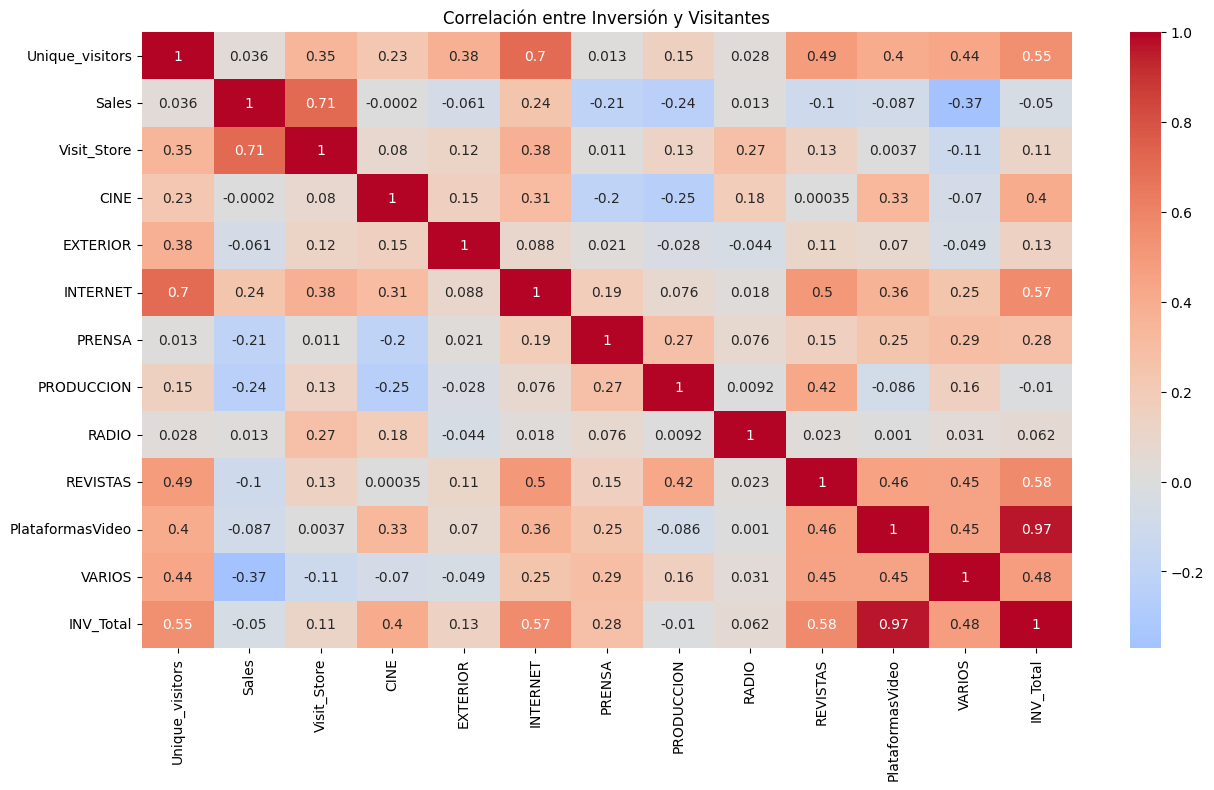

In [7]:
# Calcular matriz de correlación
corr = filtered_df[['Unique_visitors',"Sales", 'Visit_Store', "CINE","EXTERIOR","INTERNET","PRENSA","PRODUCCION","RADIO","REVISTAS","PlataformasVideo","VARIOS","INV_Total"]].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Inversión y Visitantes')
plt.show()

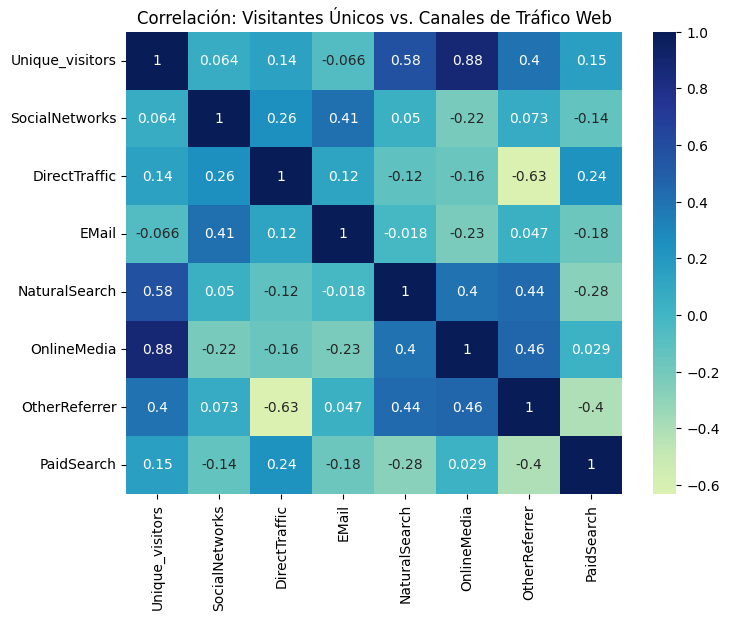

In [8]:
# Matriz de correlación centrada en fuentes de tráfico web
trafico_cols = [
    "Unique_visitors", "SocialNetworks", "DirectTraffic", "EMail",
    "NaturalSearch", "OnlineMedia", "OtherReferrer", "PaidSearch"
]

trafico_corr = filtered_df[trafico_cols].corr()

# Mostrar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(trafico_corr, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlación: Visitantes Únicos vs. Canales de Tráfico Web')
plt.show()

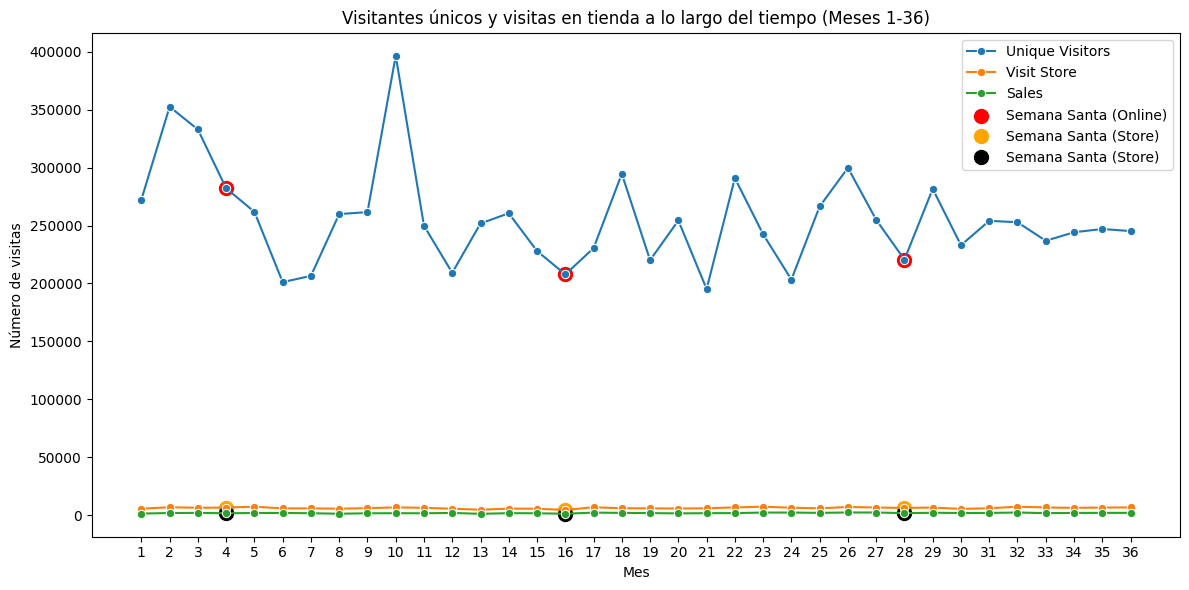

In [9]:
df['Mes_Num'] = range(1, len(df) + 1)

plt.figure(figsize=(12, 6))

# Desactivar errorbar
sns.lineplot(data=df, x='Mes_Num', y='Unique_visitors', marker='o', label='Unique Visitors', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Visit_Store', marker='o', label='Visit Store', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Sales', marker='o', label='Sales', errorbar=None)

# Colorear los puntos si es Semana Santa
easter_df = df[df['Easterweek'] == 1]
plt.scatter(easter_df['Mes_Num'], easter_df['Unique_visitors'], color='red', s=100, label='Semana Santa (Online)')
plt.scatter(easter_df['Mes_Num'], easter_df['Visit_Store'], color='orange', s=100, label='Semana Santa (Store)')
plt.scatter(easter_df['Mes_Num'], easter_df['Sales'], color='black', s=100, label='Semana Santa (Store)')

# Estética
plt.title('Visitantes únicos y visitas en tienda a lo largo del tiempo (Meses 1-36)')
plt.xlabel('Mes')
plt.ylabel('Número de visitas')
plt.legend()
plt.xticks(ticks=range(1, 37))
plt.tight_layout()
plt.show()

In [10]:
# Variables predictoras (X)
X_cols = filtered_df.drop(columns=['Sales', 'Unique_visitors', 'Visit_Store']).columns.tolist()

X = df[X_cols]

In [11]:
# Variables objetivo (Y)
y_col_online = ['Unique_visitors']
y_col_sales = ['Sales']
y_sales = df[y_col_sales]
y_online = df[y_col_online]

In [13]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Conjunto fijo de columnas predictoras
fixed_predictors = ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 
                    'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'Dias_mes', 'Dia_findemes']

# Columnas variables que se combinarán
variable_predictors = ["CINE","INTERNET","RADIO","PlataformasVideo","VARIOS","INV_Total",
                       "Dia_inicio_mes","working_days","Easterweek"]

# Variable a predecir
target = 'Unique_visitors'  # O 'Sales'

# Almacenamiento del mejor resultado
best_score = -999
best_combo = None
best_model = None

# Combinaciones de 0 a N columnas variables
for r in range(len(variable_predictors) + 1):  # Incluye combinaciones vacías
    for combo in itertools.combinations(variable_predictors, r):
        # Crear lista completa de variables para esta iteración
        full_features = fixed_predictors + list(combo)
        
        X = df[full_features].copy()
        y = df[target]

        # Comprobar que no haya NaNs
        if X.isnull().values.any() or y.isnull().values.any():
            continue

        # Escalar
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train/Test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluación
        score = r2_score(y_test, y_pred)

        # Guardar si es mejor
        if score > best_score:
            best_score = score
            best_combo = full_features
            best_model = model

# Resultados
print("🔍 Mejor combinación de variables:", best_combo)
print("📈 Mejor R2 score:", round(best_score, 4))

🔍 Mejor combinación de variables: ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'Dias_mes', 'Dia_findemes']
📈 Mejor R2 score: 0.8969


In [15]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Conjunto fijo de columnas predictoras
fixed_predictors = ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'RADIO', 
                    'Easterweek']

# Columnas variables que se combinarán
variable_predictors = ["CINE","INTERNET","PRENSA", "REVISTAS","PlataformasVideo","VARIOS","INV_Total",
                       "Dias_mes","Dia_inicio_mes","Dia_findemes","working_days",]

# Variable a predecir
target = 'Sales'  # O 'Sales'

# Almacenamiento del mejor resultado
best_score = -999
best_combo = None
best_model = None

# Combinaciones de 0 a N columnas variables
for r in range(len(variable_predictors) + 1):  # Incluye combinaciones vacías
    for combo in itertools.combinations(variable_predictors, r):
        # Crear lista completa de variables para esta iteración
        full_features = fixed_predictors + list(combo)
        
        X = df[full_features].copy()
        y = df[target]

        # Comprobar que no haya NaNs
        if X.isnull().values.any() or y.isnull().values.any():
            continue

        # Escalar
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train/Test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluación
        score = r2_score(y_test, y_pred)

        # Guardar si es mejor
        if score > best_score:
            best_score = score
            best_combo = full_features
            best_model = model

# Resultados
print("🔍 Mejor combinación de variables:", best_combo)
print("📈 Mejor R2 score:", round(best_score, 4))

🔍 Mejor combinación de variables: ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'RADIO', 'Easterweek']
📈 Mejor R2 score: 0.5454


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selección de variables predictoras según la matriz de correlación
predictors_online = ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'Dias_mes', 'Dia_findemes']
predictors_offline = ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'RADIO', 'Easterweek',]

# Variables objetivo
y_online = filtered_df['Unique_visitors']
y_offline = filtered_df['Sales']

# Preparar conjuntos X para cada modelo
X_online = filtered_df[predictors_online]
X_offline = filtered_df[predictors_offline]

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline, y_offline, test_size=0.2, random_state=42)

# Modelos de regresión lineal
model_online = LinearRegression().fit(X_train_online, y_train_online)
model_offline = LinearRegression().fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# Métricas
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"📊 Online - MSE: {mse_online:.2f}, R²: {r2_online:.2f}")
print(f"🏬 Offline - MSE: {mse_offline:.2f}, R²: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})

📊 Online - MSE: 26285060.21, R²: 0.90
🏬 Offline - MSE: 55810.92, R²: 0.55


In [18]:
coef_offline_df

,Canal,Impacto en Visitas Offline
0,Dias_fines_semana,-98.517534
1,SocialNetworks,0.011168
2,OnlineMedia,0.002528
3,OtherReferrer,-0.022177
4,PaidSearch,-0.000488
5,RADIO,0.002493
6,Easterweek,-227.773678


In [19]:
coef_online_df

,Canal,Impacto en Visitas Online
0,SocialNetworks,1.070862
1,DirectTraffic,0.557163
2,EMail,0.446790
3,NaturalSearch,0.706623
4,OtherReferrer,1.028003
5,PaidSearch,0.588855
6,REVISTAS,0.018419
7,OnlineMedia,0.863511
8,Dias_fines_semana,-545.888246
9,PRENSA,0.032839


In [20]:
columnas_inversion = [
    'CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 
    'RADIO', 'REVISTAS', 'PlataformasVideo', 'VARIOS', 'INV_Total'
]
columnas_visitas = ['OnlineMedia', 'SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch',
    'OtherReferrer', 'PaidSearch',]
# Función para obtener el factor de ajuste según el mes
def obtener_factor(mes):
    if mes >= 36:
        return 1.15
    elif mes >= 30:
        return 1.21
    elif mes >= 24:
        return 1.25
    else:
        return 1
    
# Función para obtener el factor de ajuste según el mes
def obtener_factor2(mes):
    if mes >= 36:
        return 1.05
    elif mes >= 30:
        return 1.07
    else:
        return 1

# Crear la columna 'Mes'
filtered_df['Mes'] = list(range(1, 37))  # Asegúrate de que filtered_df tenga 36 filas

# Aplicar el ajuste a cada columna de inversión
for col in columnas_inversion:
    filtered_df[f'{col}_Ajustado'] = filtered_df.apply(lambda row: row[col] * obtener_factor(row['Mes']), axis=1)

# Aplicar el ajuste a cada columna de inversión
for col in columnas_visitas:
    filtered_df[f'{col}_Ajustado'] = filtered_df.apply(lambda row: row[col] * obtener_factor2(row['Mes']), axis=1)

# También puedes visualizar algunos resultados si quieres
filtered_df.head()

C:\Users\1cnac\AppData\Local\Temp\ipykernel_11328\3212469672.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Mes'] = list(range(1, 37))  # Asegúrate de que filtered_df tenga 36 filas
C:\Users\1cnac\AppData\Local\Temp\ipykernel_11328\3212469672.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[f'{col}_Ajustado'] = filtered_df.apply(lambda row: row[col] * obtener_factor(row['Mes']), axis=1)
C:\Users\1cnac\AppData\Local\Temp\ipykernel_11328\3212469672.py:32: SettingWithCopyWarn

,Unique_visitors,Visit_Store,Sales,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek,Mes,CINE_Ajustado,EXTERIOR_Ajustado,INTERNET_Ajustado,PRENSA_Ajustado,RADIO_Ajustado,REVISTAS_Ajustado,PlataformasVideo_Ajustado,VARIOS_Ajustado,INV_Total_Ajustado,OnlineMedia_Ajustado,SocialNetworks_Ajustado,DirectTraffic_Ajustado,EMail_Ajustado,NaturalSearch_Ajustado,OtherReferrer_Ajustado,PaidSearch_Ajustado
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382,5516,1299,1415,65373,25,167199,63649,39808,13798,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600,31,5,7,21,10,0,1,59887.84,8200.00,133666.43,0.0,2426.40,18013.50,338824.94,7531.03,574600.0,63649.0,1415.0,65373.0,25.0,167199.0,39808.0,13798.0
2022-02-01,352581,6769,1752,546,77209,26,176733,124861,45543,28656,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515,28,1,7,20,8,0,2,72291.56,94627.51,189275.94,10000.0,0.00,49110.91,487537.14,6972.02,916515.0,124861.0,546.0,77209.0,26.0,176733.0,45543.0,28656.0
2022-03-01,332955,6249,1897,5444,83178,341,173514,104132,43583,15243,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522,31,1,3,23,8,0,3,55000.00,0.00,214037.62,4500.0,0.00,0.00,75000.00,15284.85,367522.0,104132.0,5444.0,83178.0,341.0,173514.0,43583.0,15243.0
2022-04-01,282169,6507,1546,1184,69335,162,162805,74044,39650,18510,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941188,30,4,5,22,8,1,4,10883.30,0.00,194816.97,48800.0,1140.00,40876.00,610865.89,12255.75,941188.0,74044.0,1184.0,69335.0,162.0,162805.0,39650.0,18510.0
2022-05-01,261829,7183,1784,8648,70972,210,156011,44196,40472,20031,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390,31,6,1,21,10,0,5,74333.20,0.00,130795.16,11000.0,102851.86,20775.75,393807.74,7926.46,746390.0,44196.0,8648.0,70972.0,210.0,156011.0,40472.0,20031.0


In [21]:
filtered_df_ajustado = filtered_df.copy()


filtered_df_ajustado.head(10)

,Unique_visitors,Visit_Store,Sales,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek,Mes,CINE_Ajustado,EXTERIOR_Ajustado,INTERNET_Ajustado,PRENSA_Ajustado,RADIO_Ajustado,REVISTAS_Ajustado,PlataformasVideo_Ajustado,VARIOS_Ajustado,INV_Total_Ajustado,OnlineMedia_Ajustado,SocialNetworks_Ajustado,DirectTraffic_Ajustado,EMail_Ajustado,NaturalSearch_Ajustado,OtherReferrer_Ajustado,PaidSearch_Ajustado
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382,5516,1299,1415,65373,25,167199,63649,39808,13798,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600,31,5,7,21,10,0,1,59887.84,8200.00,133666.43,0.0,2426.40,18013.50,338824.94,7531.03,574600.0,63649.0,1415.0,65373.0,25.0,167199.0,39808.0,13798.0
2022-02-01,352581,6769,1752,546,77209,26,176733,124861,45543,28656,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515,28,1,7,20,8,0,2,72291.56,94627.51,189275.94,10000.0,0.00,49110.91,487537.14,6972.02,916515.0,124861.0,546.0,77209.0,26.0,176733.0,45543.0,28656.0
2022-03-01,332955,6249,1897,5444,83178,341,173514,104132,43583,15243,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522,31,1,3,23,8,0,3,55000.00,0.00,214037.62,4500.0,0.00,0.00,75000.00,15284.85,367522.0,104132.0,5444.0,83178.0,341.0,173514.0,43583.0,15243.0
2022-04-01,282169,6507,1546,1184,69335,162,162805,74044,39650,18510,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941188,30,4,5,22,8,1,4,10883.30,0.00,194816.97,48800.0,1140.00,40876.00,610865.89,12255.75,941188.0,74044.0,1184.0,69335.0,162.0,162805.0,39650.0,18510.0
2022-05-01,261829,7183,1784,8648,70972,210,156011,44196,40472,20031,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390,31,6,1,21,10,0,5,74333.20,0.00,130795.16,11000.0,102851.86,20775.75,393807.74,7926.46,746390.0,44196.0,8648.0,70972.0,210.0,156011.0,40472.0,20031.0
2022-06-01,201141,5798,1818,1082,61455,2374,134355,15600,35272,13658,37400.00,0.00,67827.66,0.0,12250.0,5526.49,75573.13,0.00,5405.72,203983,30,2,3,22,8,0,6,37400.00,0.00,67827.66,0.0,5526.49,75573.13,0.00,5405.72,203983.0,15600.0,1082.0,61455.0,2374.0,134355.0,35272.0,13658.0
2022-07-01,206538,5784,1583,909,66835,204,144300,11000,35674,12262,58816.50,0.00,61897.17,0.0,650.0,158.40,2600.00,1500.00,4574.50,130197,31,4,6,22,9,0,7,58816.50,0.00,61897.17,0.0,158.40,2600.00,1500.00,4574.50,130197.0,11000.0,909.0,66835.0,204.0,144300.0,35674.0,12262.0
2022-08-01,259903,5505,1142,7511,78704,14,172986,15205,42545,18902,0.00,0.00,46362.01,13000.0,9750.0,345.60,33860.00,391987.87,28716.26,524022,31,7,2,22,9,0,8,0.00,0.00,46362.01,13000.0,345.60,33860.00,391987.87,28716.26,524022.0,15205.0,7511.0,78704.0,14.0,172986.0,42545.0,18902.0
2022-09-01,261618,5967,1541,1773,58630,199,174125,41832,41167,24528,39483.30,0.00,77470.41,9507.8,7850.0,2686.80,14580.00,0.00,6645.27,158224,30,3,4,22,8,0,9,39483.30,0.00,77470.41,9507.8,2686.80,14580.00,0.00,6645.27,158224.0,41832.0,1773.0,58630.0,199.0,174125.0,41167.0,24528.0


In [22]:
import pandas as pd
import numpy as np

# Coeficientes de regresión para visitas
coeficientes = {
    'SocialNetworks_Ajustado': 1.070862,
    'DirectTraffic': 0.557163,
    'EMail_Ajustado': 0.446789,
    'NaturalSearch': 0.706623,
    'OtherReferrer_Ajustado': 1.028003,
    'PaidSearch_Ajustado': 0.588855,
    'REVISTAS_Ajustado': 0.018419,
    'OnlineMedia_Ajustado': 0.863510,
    'Dias_fines_semana': -545.888246,
    'PRENSA_Ajustado': 0.032839,
    'Dias_mes': 558.148386,
    'Dia_findemes': -234.785163
}

# Coeficientes de regresión para ventas
coeficientes_sales = {
    'Dias_fines_semana': -98.517534,
    'SocialNetworks_Ajustado': 0.011168,
    'OnlineMedia_Ajustado': 0.002528,
    'OtherReferrer': -0.022178,
    'PaidSearch': -0.000488,
    'RADIO_Ajustado': 0.002493,
    'Easterweek': -227.773678
}

# Generar un dataset mensual para 2025
fechas = pd.date_range(start='2025-01-01', end='2025-12-31', freq='MS')
df = pd.DataFrame({'Fecha': fechas})
df['Dias_mes'] = df['Fecha'].dt.days_in_month
df['Dias_fines_semana'] = df['Fecha'].apply(lambda x: pd.date_range(start=x, end=x + pd.offsets.MonthEnd(0)).weekday.isin([5,6]).sum())
df['Dia_findemes'] = df['Fecha'].dt.is_month_end.astype(int)

# Generar variables independientes con valores aleatorios en rangos realistas
np.random.seed(42)
df['SocialNetworks_Ajustado'] = np.random.uniform(2000, 10000, len(df))
df['DirectTraffic'] = np.random.uniform(50000, 80000, len(df))
df['EMail_Ajustado'] = np.random.uniform(100, 2500, len(df))
df['NaturalSearch'] = np.random.uniform(13000, 200000, len(df))
df['OtherReferrer_Ajustado'] = np.random.uniform(35000, 45000, len(df))
df['PaidSearch_Ajustado'] = np.random.uniform(12000, 25000, len(df))
df['REVISTAS_Ajustado'] = np.random.uniform(20000, 180000, len(df))
df['OnlineMedia_Ajustado'] = np.random.uniform(10000, 120000, len(df))
df['PRENSA_Ajustado'] = np.random.uniform(0, 1000, len(df))

# Para ventas
df['OtherReferrer'] = np.random.uniform(500, 2000, len(df))
df['PaidSearch'] = np.random.uniform(1000, 3000, len(df))
df['RADIO_Ajustado'] = np.random.uniform(0, 1000, len(df))
df['Easterweek'] = [1 if fecha.month == 4 else 0 for fecha in df['Fecha']]  # Asumiendo Pascua en abril

# Calcular predicciones
df['Prediccion_Visitas'] = sum(df[col] * val for col, val in coeficientes.items())
df['Prediccion_Ventas'] = sum(df[col] * val for col, val in coeficientes_sales.items())

df_final = df[['Fecha'] + list(coeficientes.keys()) + list(coeficientes_sales.keys()) + ['Prediccion_Visitas', 'Prediccion_Ventas']]
df_final.head()

,Fecha,SocialNetworks_Ajustado,DirectTraffic,EMail_Ajustado,NaturalSearch,OtherReferrer_Ajustado,PaidSearch_Ajustado,REVISTAS_Ajustado,OnlineMedia_Ajustado,Dias_fines_semana,PRENSA_Ajustado,Dias_mes,Dia_findemes,Dias_fines_semana,SocialNetworks_Ajustado,OnlineMedia_Ajustado,OtherReferrer,PaidSearch,RADIO_Ajustado,Easterweek,Prediccion_Visitas,Prediccion_Ventas
0,2025-01-01,4996.320951,74973.279224,1194.567962,69962.774835,40467.102793,17052.804766,20883.538740,44208.055389,8,522.732829,31,0,8,4996.320951,44208.055389,843.197248,2614.880310,119.865367,0,200247.077340,-640.261061
1,2025-02-01,9605.714451,56370.173320,1984.422307,31264.685319,36848.544555,15527.537413,150473.828553,45770.165423,8,427.541018,28,0,8,9605.714451,45770.165423,615.469865,2792.182600,337.615171,0,165266.277503,-579.327476
2,2025-03-01,7855.951534,55454.749016,579.217077,140951.575958,44695.846278,22773.587619,133097.175016,90256.679617,10,25.419127,31,0,10,7855.951534,90256.679617,934.627179,1636.006950,942.909704,0,290759.807101,-688.447046
3,2025-04-01,6789.267874,55502.135296,1334.162652,95308.516329,42751.328234,16637.793247,136641.146887,80131.321849,8,107.891427,30,0,8,6789.267874,80131.321849,741.831931,1220.103849,323.202932,1,243975.005206,-753.761439
4,2025-05-01,3248.149124,59127.267289,1521.794965,35821.149916,44394.989416,15652.148626,143403.255470,107593.401683,9,31.429186,31,0,9,3248.149124,107593.401683,1894.546479,1455.870325,518.790622,0,225208.803747,-619.820729


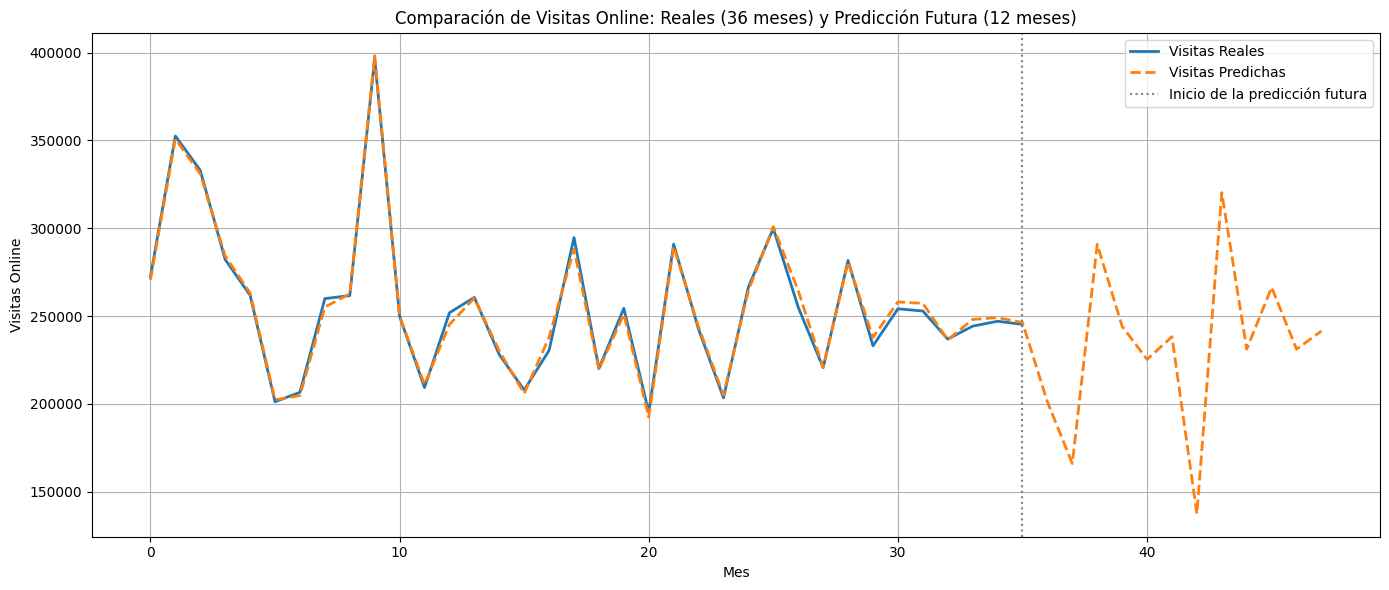

In [23]:
coeficientes = {
    'SocialNetworks_Ajustado': 1.070862,
    'DirectTraffic': 0.557163,
    'EMail_Ajustado': 0.446789,
    'NaturalSearch': 0.706623,
    'OtherReferrer_Ajustado': 1.028003,
    'PaidSearch_Ajustado': 0.588855,
    'REVISTAS_Ajustado': 0.018419,
    'OnlineMedia_Ajustado': 0.863510,
    'Dias_fines_semana': -545.888246,
    'PRENSA_Ajustado': 0.032839,
    'Dias_mes': 558.148386,
    'Dia_findemes': -234.785163
}

# ========================
# DATOS REALES (36 MESES)
# ========================
# Suponiendo que ya tienes `filtered_df_ajustado` cargado

# Predicción sobre datos reales
X_features = list(coeficientes.keys())
X = filtered_df_ajustado[X_features]
coefs = np.array(list(coeficientes.values()))
filtered_df_ajustado['Visitas_Predichas'] = X @ coefs

# ========================
# GENERAR PREDICCIÓN 12 MESES FUTUROS
# ========================
fechas = pd.date_range(start='2025-01-01', end='2025-12-31', freq='MS')
df = pd.DataFrame({'Fecha': fechas})
df['Dias_mes'] = df['Fecha'].dt.days_in_month
df['Dias_fines_semana'] = df['Fecha'].apply(lambda x: pd.date_range(start=x, end=x + pd.offsets.MonthEnd(0)).weekday.isin([5,6]).sum())
df['Dia_findemes'] = df['Fecha'].dt.is_month_end.astype(int)

# Variables independientes (valores aleatorios en rangos razonables)
np.random.seed(42)
df['SocialNetworks_Ajustado'] = np.random.uniform(2000, 10000, len(df))
df['DirectTraffic'] = np.random.uniform(50000, 80000, len(df))
df['EMail_Ajustado'] = np.random.uniform(100, 2500, len(df))
df['NaturalSearch'] = np.random.uniform(13000, 200000, len(df))
df['OtherReferrer_Ajustado'] = np.random.uniform(35000, 45000, len(df))
df['PaidSearch_Ajustado'] = np.random.uniform(12000, 25000, len(df))
df['REVISTAS_Ajustado'] = np.random.uniform(20000, 180000, len(df))
df['OnlineMedia_Ajustado'] = np.random.uniform(10000, 120000, len(df))
df['PRENSA_Ajustado'] = np.random.uniform(0, 50000, len(df))

# Calcular la predicción de visitas para 2025
df['Visitas_Predichas'] = sum(df[col] * val for col, val in coeficientes.items())
df['Unique_visitors'] = np.nan  # No hay datos reales para 2025

# ========================
# UNIR LOS DOS DATAFRAMES
# ========================
# Asegurarse de que columnas coincidan
df_futuro = df[X_features + ['Unique_visitors', 'Visitas_Predichas']]
df_completo = pd.concat([filtered_df_ajustado, df_futuro], ignore_index=True)

# ========================
# GRAFICAR TODO JUNTO
# ========================
plt.figure(figsize=(14, 6))
plt.plot(df_completo['Unique_visitors'].values, label='Visitas Reales', linewidth=2)
plt.plot(df_completo['Visitas_Predichas'].values, label='Visitas Predichas', linestyle='--', linewidth=2)
plt.axvline(x=len(filtered_df_ajustado)-1, color='gray', linestyle=':', label='Inicio de la predicción futura')
plt.title('Comparación de Visitas Online: Reales (36 meses) y Predicción Futura (12 meses)')
plt.xlabel('Mes')
plt.ylabel('Visitas Online')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

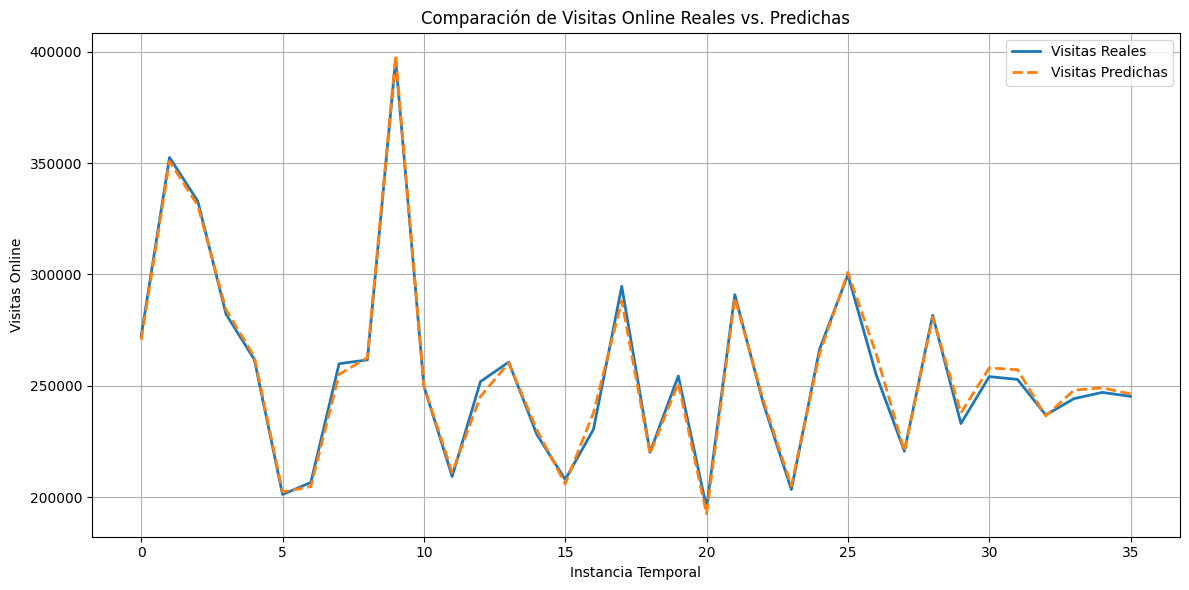

In [24]:
coeficientes = {
    'SocialNetworks_Ajustado': 1.070862,
    'DirectTraffic': 0.557163,
    'EMail_Ajustado': 0.446789,
    'NaturalSearch': 0.706623,
    'OtherReferrer_Ajustado': 1.028003,
    'PaidSearch_Ajustado': 0.588855,
    'REVISTAS_Ajustado': 0.018419,
    'OnlineMedia_Ajustado': 0.863510,
    'Dias_fines_semana': -545.888246,
    'PRENSA_Ajustado': 0.032839,
    'Dias_mes': 558.148386,
    'Dia_findemes': -234.785163
}

X_features = list(coeficientes.keys())
X = filtered_df_ajustado[X_features]
coefs = np.array(list(coeficientes.values()))

# Predicciones
filtered_df_ajustado['Visitas_Predichas'] = X @ coefs

# Gráfica de visitas reales vs. visitas predichas
plt.figure(figsize=(12, 6))
plt.plot(filtered_df_ajustado['Unique_visitors'].values, label='Visitas Reales', linewidth=2)
plt.plot(filtered_df_ajustado['Visitas_Predichas'].values, label='Visitas Predichas', linestyle='--', linewidth=2)
plt.title('Comparación de Visitas Online Reales vs. Predichas')
plt.xlabel('Instancia Temporal')
plt.ylabel('Visitas Online')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

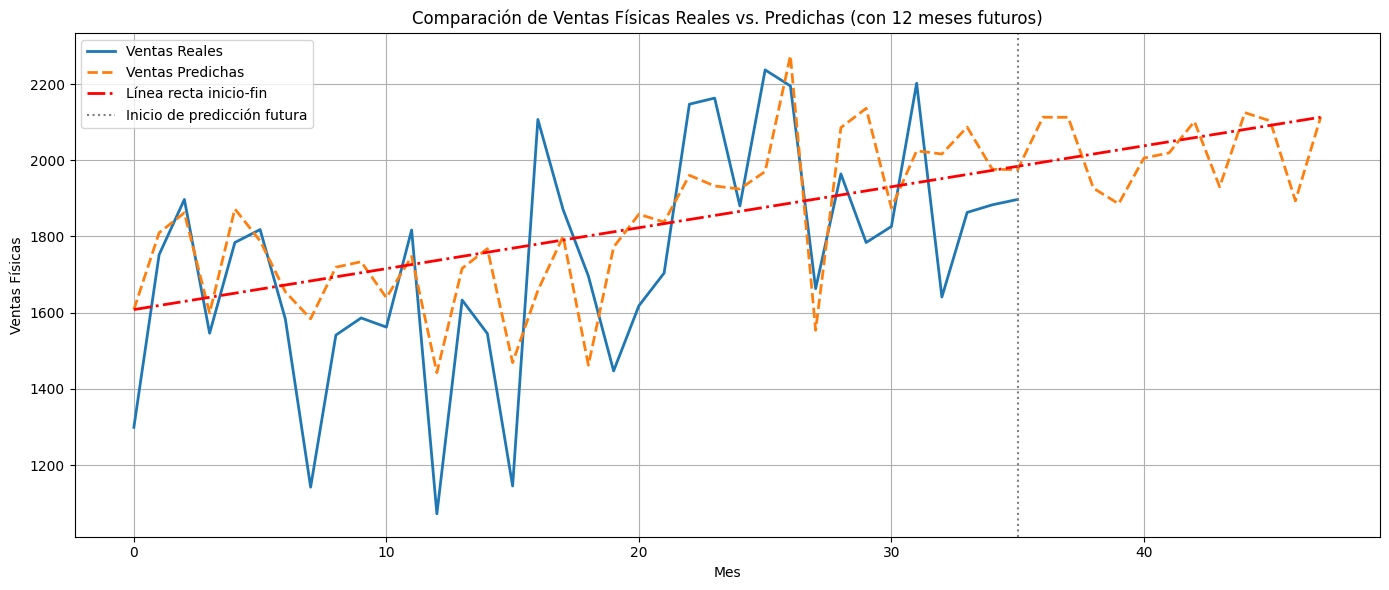

In [25]:
# Coeficientes de regresión para ventas
coeficientes_sales = {
    'Dias_fines_semana': -98.517534,
    'SocialNetworks_Ajustado': 0.011168,
    'OnlineMedia_Ajustado': 0.002528,
    'OtherReferrer': -0.022178,
    'PaidSearch': -0.000488,
    'RADIO_Ajustado': 0.002493,
    'Easterweek': -227.773678
}

X_features_sales = list(coeficientes_sales.keys())
X_sales = filtered_df_ajustado[X_features_sales]
coefs_sales = np.array(list(coeficientes_sales.values()))

filtered_df_ajustado['Ventas_Predichas'] = X_sales @ coefs_sales
filtered_df_ajustado['Ventas_Predichas'] += 3300  # Ajuste de sesgo

# ========================
# GENERAR DATOS FUTUROS PARA 2025
# ========================
fechas = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
df_ventas_futuro = pd.DataFrame({'Fecha': fechas})
df_ventas_futuro['Dias_mes'] = df_ventas_futuro['Fecha'].dt.days_in_month
df_ventas_futuro['Dias_fines_semana'] = df_ventas_futuro['Fecha'].apply(lambda x: pd.date_range(start=x, end=x + pd.offsets.MonthEnd(0)).weekday.isin([5,6]).sum())
df_ventas_futuro['Dia_findemes'] = df_ventas_futuro['Fecha'].dt.is_month_end.astype(int)

# Variables independientes simuladas con valores realistas
np.random.seed(42)
df_ventas_futuro['SocialNetworks_Ajustado'] = np.random.uniform(800, 2500, len(df_ventas_futuro))
df_ventas_futuro['OnlineMedia_Ajustado'] = np.random.uniform(400, 2000, len(df_ventas_futuro))
df_ventas_futuro['OtherReferrer'] = np.random.uniform(400, 1500, len(df_ventas_futuro))
df_ventas_futuro['PaidSearch'] = np.random.uniform(800, 2500, len(df_ventas_futuro))
df_ventas_futuro['RADIO_Ajustado'] = np.random.uniform(0, 800, len(df_ventas_futuro))
df_ventas_futuro['Easterweek'] = [1 if fecha.month == 4 else 0 for fecha in df_ventas_futuro['Fecha']]  # Pascua en abril

# Predicción de ventas para los meses futuros
df_ventas_futuro['Ventas_Predichas'] = sum(df_ventas_futuro[col] * val for col, val in coeficientes_sales.items())
df_ventas_futuro['Ventas_Predichas'] += 2900  # Mismo sesgo

# Simulamos columna de ventas reales con NaNs
df_ventas_futuro['Sales'] = np.nan

# ========================
# UNIR LOS DOS DATASETS
# ========================
df_futuro_ventas_final = df_ventas_futuro[X_features_sales + ['Sales', 'Ventas_Predichas']]
df_total_sales = pd.concat([filtered_df_ajustado, df_futuro_ventas_final], ignore_index=True)

# ========================
# GRAFICAR RESULTADO COMPLETO
# ========================
plt.figure(figsize=(14, 6))
plt.plot(df_total_sales['Sales'].values, label='Ventas Reales', linewidth=2)
plt.plot(df_total_sales['Ventas_Predichas'].values, label='Ventas Predichas', linestyle='--', linewidth=2)
# Línea recta del primer al último punto de Ventas Predichas
x_vals = [0, len(df_total_sales['Ventas_Predichas']) - 1]
y_vals = [df_total_sales['Ventas_Predichas'].iloc[0], df_total_sales['Ventas_Predichas'].iloc[-1]]
plt.plot(x_vals, y_vals, color='red', linestyle='-.', linewidth=2, label='Línea recta inicio-fin')

plt.axvline(x=len(filtered_df_ajustado)-1, color='gray', linestyle=':', label='Inicio de predicción futura')
plt.title('Comparación de Ventas Físicas Reales vs. Predichas (con 12 meses futuros)')
plt.xlabel('Mes')
plt.ylabel('Ventas Físicas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

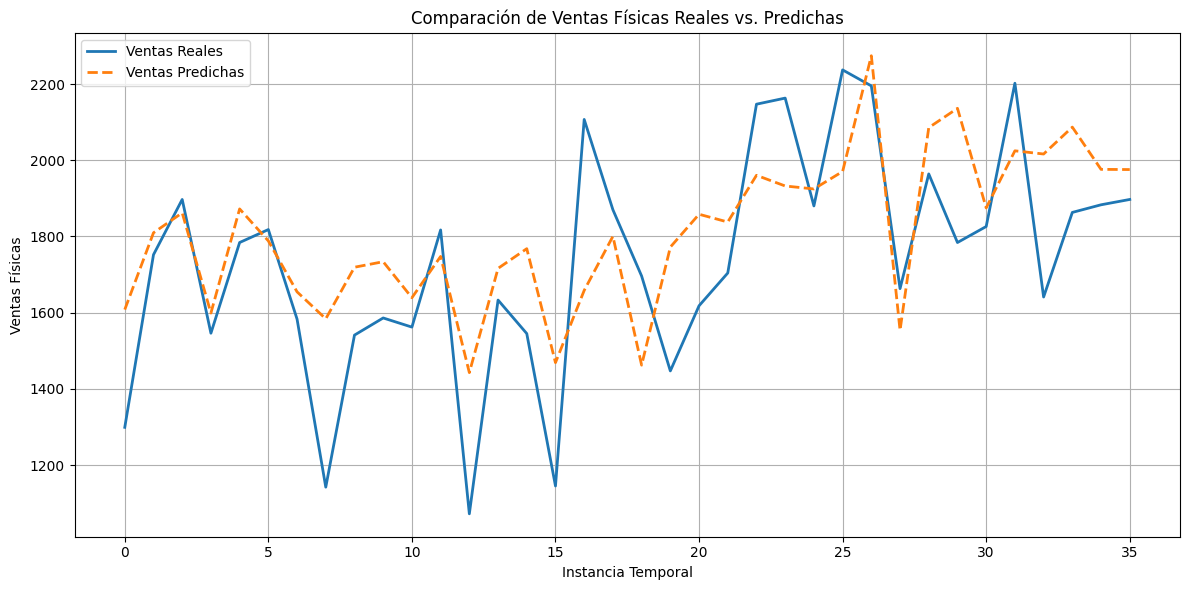

In [26]:
coeficientes_sales = {
    'Dias_fines_semana': -98.517534,
    'SocialNetworks_Ajustado': 0.011168,
    'OnlineMedia_Ajustado': 0.002528,
    'OtherReferrer': -0.022178,
    'PaidSearch': -0.000488,
    'RADIO_Ajustado': 0.002493,
    'Easterweek': -227.773678
}

# Seleccionar las features
X_features_sales = list(coeficientes_sales.keys())
X_sales = filtered_df_ajustado[X_features_sales]
coefs_sales = np.array(list(coeficientes_sales.values()))

# Calcular predicción de ventas
filtered_df_ajustado['Ventas_Predichas'] = X_sales @ coefs_sales

# Le añadimos un sesgo para ajustar la predicción a la realidad
filtered_df_ajustado['Ventas_Predichas'] += 3300

# Graficar ventas reales vs predichas
plt.figure(figsize=(12, 6))
plt.plot(filtered_df_ajustado['Sales'].values, label='Ventas Reales', linewidth=2)
plt.plot(filtered_df_ajustado['Ventas_Predichas'].values, label='Ventas Predichas', linestyle='--', linewidth=2)
plt.title('Comparación de Ventas Físicas Reales vs. Predichas')
plt.xlabel('Instancia Temporal')
plt.ylabel('Ventas Físicas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()